In [50]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import itertools
from scipy.stats import norm 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib.ticker import StrMethodFormatter

In [51]:
df1=pd.read_csv("imdb.csv",escapechar='\\')

In [52]:
df2=pd.read_csv('movie_metadata.csv')

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14761 entries, 0 to 14760
Data columns (total 44 columns):
fn                  14761 non-null object
tid                 14761 non-null object
title               14761 non-null object
wordsInTitle        14748 non-null object
url                 14761 non-null object
imdbRating          13551 non-null float64
ratingCount         13551 non-null float64
duration            13745 non-null float64
year                14731 non-null float64
type                14761 non-null object
nrOfWins            14761 non-null int64
nrOfNominations     14761 non-null int64
nrOfPhotos          14761 non-null int64
nrOfNewsArticles    14761 non-null int64
nrOfUserReviews     14761 non-null int64
nrOfGenre           14761 non-null int64
Action              14761 non-null int64
Adult               14761 non-null int64
Adventure           14761 non-null int64
Animation           14761 non-null int64
Biography           14761 non-null int64
Comedy          

In [54]:
df1.describe()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
count,13551.000000,1.355100e+04,13745.000000,14731.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,...,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000,14761.000000
mean,6.865707,2.642480e+04,5424.595417,1990.691263,3.090509,4.511754,23.545830,248.223630,103.239550,2.232234,...,0.010839,0.008604,0.127227,0.066798,0.037735,0.016056,0.036109,0.089493,0.032112,0.022153
std,1.119515,6.506456e+04,2784.823414,22.220563,9.226644,16.182953,65.285788,1051.247069,229.107375,0.828764,...,0.103550,0.092360,0.333239,0.249680,0.190560,0.125694,0.186567,0.285463,0.176303,0.147186
min,1.000000,5.000000e+00,2.000000,1888.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,6.025000e+02,3720.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.977000e+03,5700.000000,1999.000000,0.000000,0.000000,7.000000,8.000000,30.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.600000,2.085850e+04,6660.000000,2007.000000,2.000000,3.000000,26.000000,101.000000,103.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000,1.183395e+06,68400.000000,2017.000000,226.000000,542.000000,2810.000000,32345.000000,4928.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


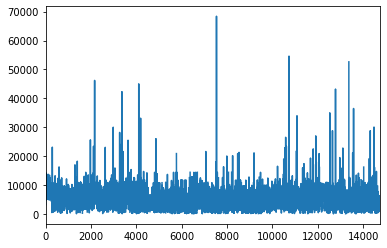

In [55]:
df1['duration'].plot(kind='line')

In [56]:
df1.corr()

,imdbRating,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
imdbRating,1.000000,0.155587,0.002109,-0.107825,0.196628,0.133735,0.077739,0.077474,0.079264,-0.000752,...,-0.044206,-0.038899,0.000553,-0.101233,-0.016555,-0.008002,-0.012001,-0.074889,0.073230,-0.003749
ratingCount,0.155587,1.000000,0.179667,0.164184,0.410469,0.323682,0.349084,0.527880,0.831163,0.132437,...,-0.025000,-0.030650,-0.007889,0.089667,-0.072680,0.002619,-0.043506,0.137124,-0.022521,-0.035393
duration,0.002109,0.179667,1.000000,-0.076425,0.126796,0.039913,0.041645,0.052611,0.223513,0.173650,...,-0.041387,-0.084107,0.143639,-0.001983,-0.311864,0.062029,-0.109212,0.100035,0.091947,0.046722
year,-0.107825,0.164184,-0.076425,1.000000,0.074972,0.082769,0.097278,0.127292,0.107724,-0.052972,...,0.068777,0.066892,-0.132150,0.008967,-0.043119,0.017439,0.140067,0.036430,-0.132970,-0.164510
nrOfWins,0.196628,0.410469,0.126796,0.074972,1.000000,0.805972,0.276317,0.361222,0.379612,0.051590,...,-0.018613,-0.015304,0.050285,-0.028858,-0.057007,-0.005342,-0.050309,0.014853,0.025744,-0.028816
nrOfNominations,0.133735,0.323682,0.039913,0.082769,0.805972,1.000000,0.379179,0.421654,0.300093,0.044488,...,-0.009698,-0.003309,0.027224,-0.009299,-0.054244,-0.007204,-0.030491,0.004341,-0.007161,-0.027060
nrOfPhotos,0.077739,0.349084,0.041645,0.097278,0.276317,0.379179,1.000000,0.580414,0.314884,0.110914,...,-0.034779,0.079199,0.022605,0.035711,-0.067615,0.004794,-0.064707,0.036797,-0.017274,-0.016770
nrOfNewsArticles,0.077474,0.527880,0.052611,0.127292,0.361222,0.421654,0.580414,1.000000,0.423742,0.085858,...,-0.014688,0.048266,-0.010807,0.067120,-0.045949,-0.004928,-0.027123,0.049573,-0.025943,-0.022273
nrOfUserReviews,0.079264,0.831163,0.223513,0.107724,0.379612,0.300093,0.314884,0.423742,1.000000,0.163536,...,-0.046484,-0.037725,0.012851,0.123791,-0.083478,0.000189,-0.085135,0.165610,-0.008322,-0.025478
nrOfGenre,-0.000752,0.132437,0.173650,-0.052972,0.051590,0.044488,0.110914,0.085858,0.163536,1.000000,...,-0.033282,-0.048233,0.192786,0.123769,0.003280,0.053305,-0.045912,0.160146,0.097801,-0.039957


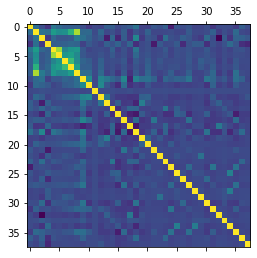

In [57]:
plt.matshow(df1.corr())
plt.show()

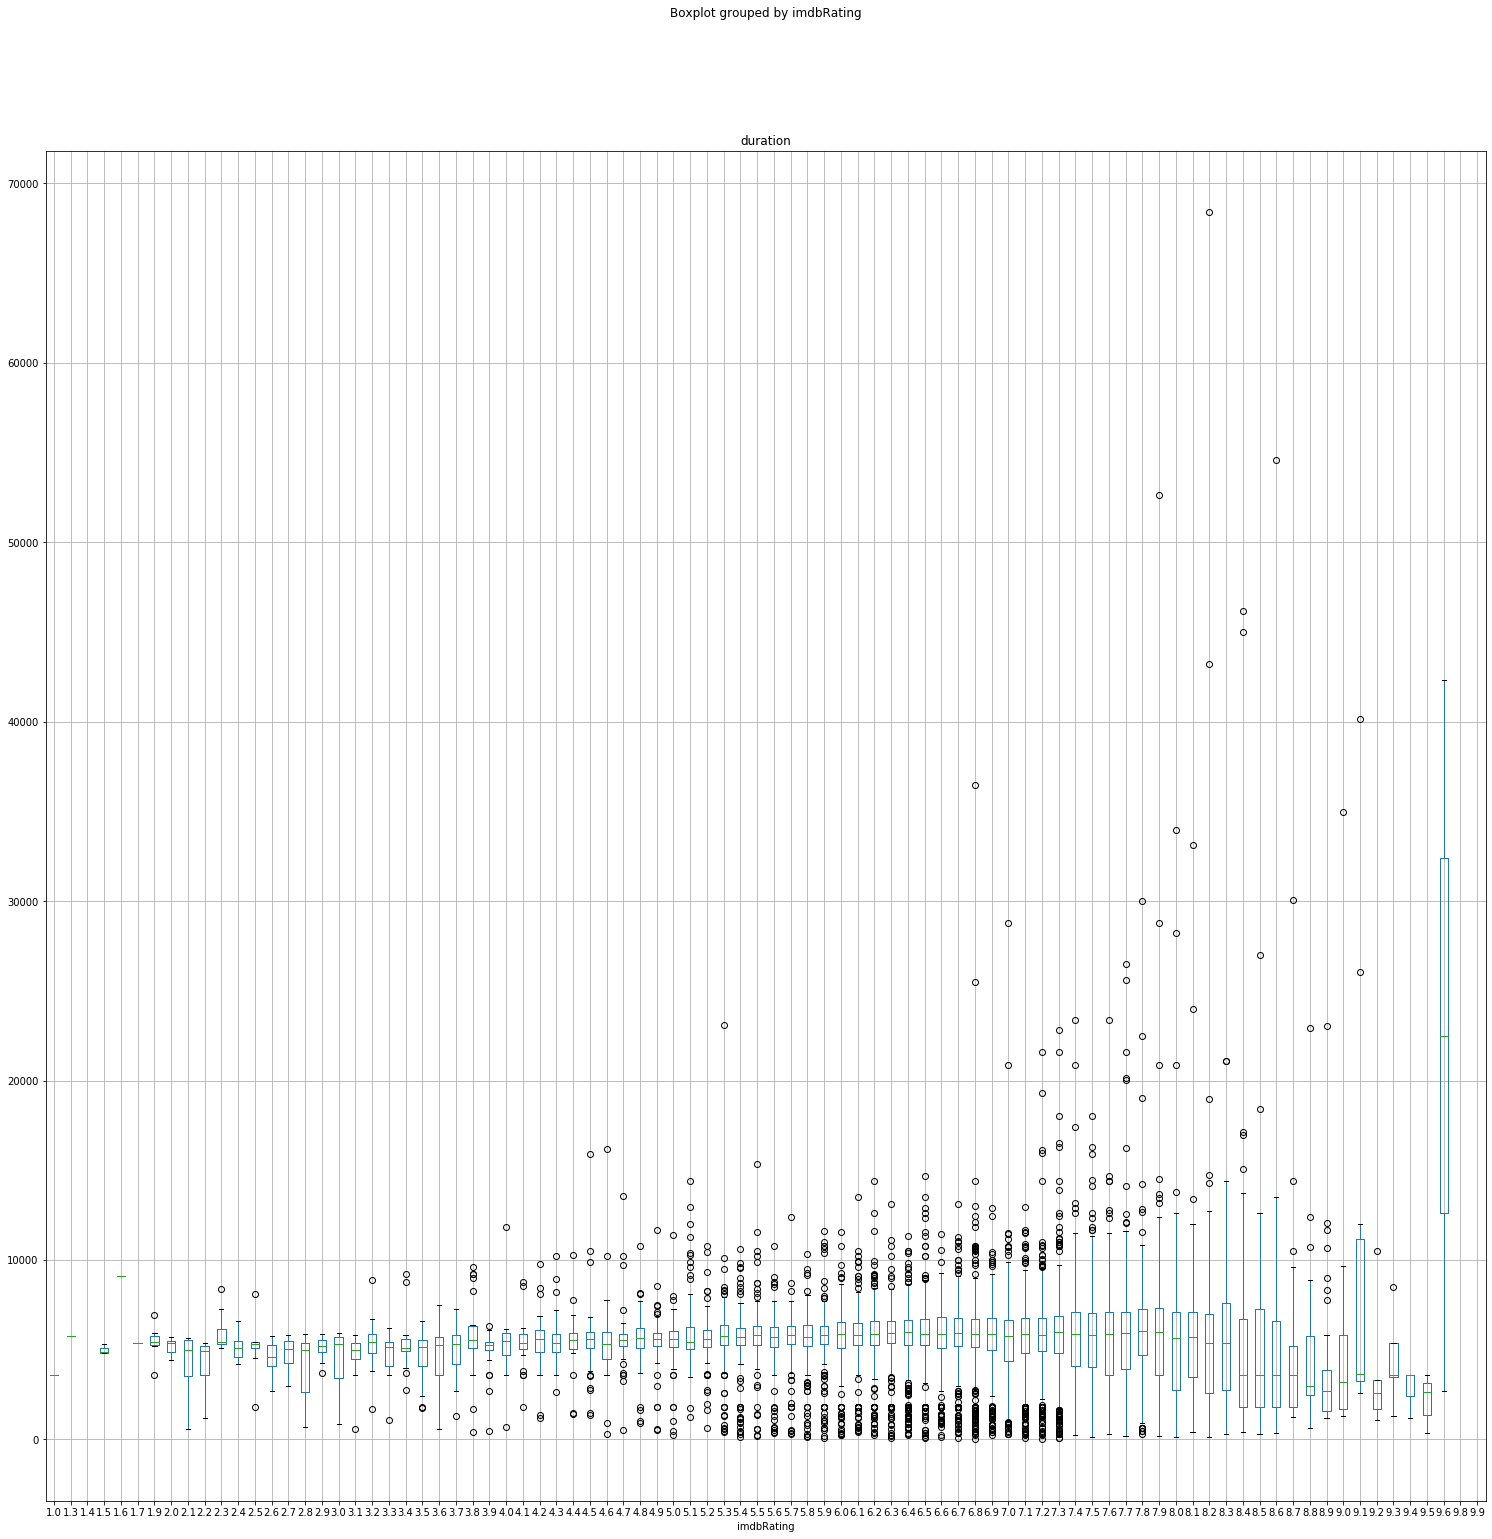

In [58]:
df1.boxplot(column='duration', by='imdbRating',figsize =(25,25))

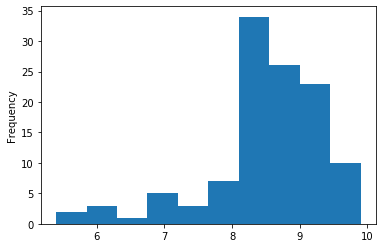

In [59]:
df1.groupby(['year'])['imdbRating'].max().plot.hist()

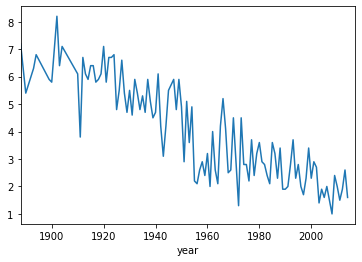

In [60]:
df1.groupby(['year'])['imdbRating'].min().plot()

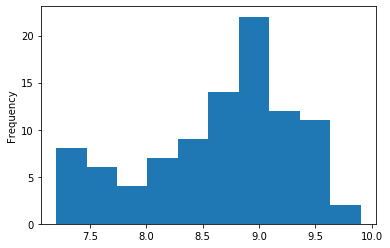

In [73]:
df1['len_of_char']=df1['title'].apply(lambda x:len(x.split(' (')[0]))
df1.groupby(['len_of_char'])['imdbRating'].max().plot.hist()

Text(0, 0.5, 'imdbRating')

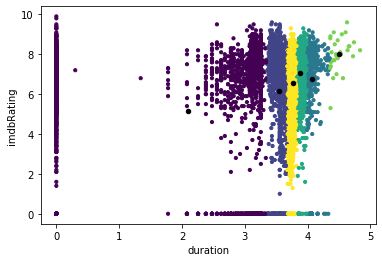

In [77]:
new_df=pd.DataFrame(columns=['dur','imdb_r'])
new_df['dur']=df1['duration']
new_df['imdb_r']=df1['imdbRating']
new_df['imdb_r'].fillna(0,inplace=True)
new_df['dura']=np.log10(new_df['dur'])


new_df['dura'].fillna(0,inplace=True)
new_df['dur'].fillna(0,inplace=True)
kmeans = KMeans(n_clusters=6).fit(new_df)
y_kmeans= kmeans.predict(new_df)

plt.scatter(new_df.iloc[:, 2], new_df.iloc[:, 1], c=y_kmeans, s=10,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 1], c='black', s=20, alpha=1.0)
plt.xlabel('duration')
plt.ylabel('imdbRating')

In [61]:
df2.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [62]:
df2.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [63]:
df2.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


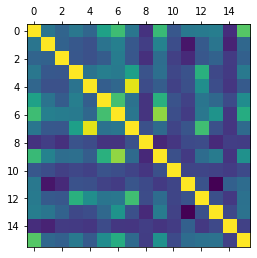

In [64]:
plt.matshow(df2.corr())
plt.show()

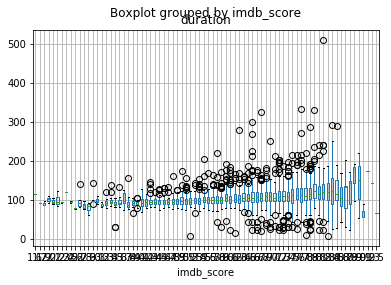

In [65]:
df2.boxplot(column='duration', by='imdb_score')

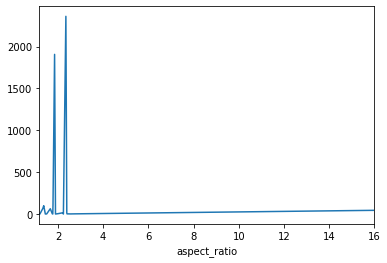

In [66]:
df2.groupby(['aspect_ratio'])['imdb_score'].count().plot()

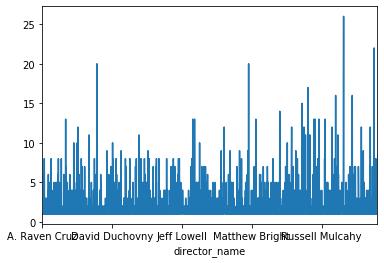

In [67]:
df2.groupby(['director_name'])['imdb_score'].count().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E768A4278>,
      dtype=object)

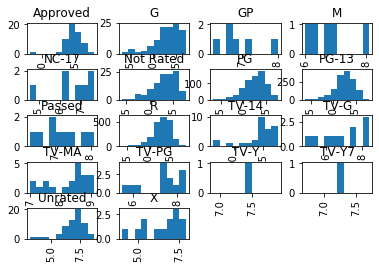

In [68]:
df2['imdb_score'].hist(by=df2['content_rating'])

Text(0.5, 1.0, 'duration vs imdb_score')

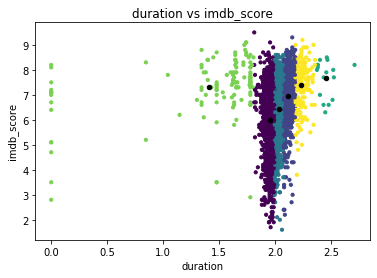

In [79]:
new_df2=pd.DataFrame(columns=['dur','imdb_r'])
new_df2['dur']=df2['duration']
new_df2['imdb_r']=df2['imdb_score']

new_df2['imdb_r'].fillna(0,inplace=True)

new_df2['dura']=np.log10(new_df2['dur'])

new_df2['dura'].fillna(0,inplace=True)

new_df2['dur'].fillna(0,inplace=True)

kmeans = KMeans(n_clusters=6).fit(new_df2)
y_kmeans= kmeans.predict(new_df2)

plt.scatter(new_df2.iloc[:, 2], new_df2.iloc[:, 1], c=y_kmeans, s=10,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 1], c='black', s=20, alpha=1.0)
plt.xlabel('duration')
plt.ylabel('imdb_score')
plt.title('duration vs imdb_score')

Text(0.5, 1.0, 'Most liked person in movie cast')

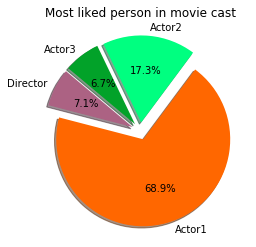

In [86]:

a=df2['director_facebook_likes'].sum()
b=df2['actor_1_facebook_likes'].sum()
c=df2['actor_2_facebook_likes'].sum()
d=df2['actor_3_facebook_likes'].sum()

data = {'Person':['Director', 'Actor1', 'Actor2', 'Actor3'], 'likes':[a, b, c, d]}

df_f = pd.DataFrame(data)


person =df_f['Person']

likes =df_f['likes']



colors = ["#ac6283", "#ff6700", "#00ff80","#02a229"]
explode = (0.1, 0.1, 0.1, 0.1)

plt.pie(likes, labels=person,colors=colors,explode=explode,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Most liked person in movie cast")
